In [11]:
import json
import pandas as pd
import datetime as dt
from imdb import IMDb
from imdb import helpers
ia = IMDb()

## User Defined Config

In [22]:
# Must be a list of TV series to plot
titles = [
'0096697'


]

## Extract the Data

In [23]:
start = dt.datetime.now()
series = [ia.get_movie(t) for t in titles]

end = dt.datetime.now()
print(f'Time elapsed: {end - start}')

Time elapsed: 0:00:04.447833


In [24]:
start = dt.datetime.now()
for s in series:
    ia.update(s, 'episodes')

end = dt.datetime.now()
print(f'Time elapsed: {end - start}')

Time elapsed: 0:00:26.266635


### Inspect...

In [16]:
# The Simpsons S01E02
for k in series[0]['episodes'][1][2].keys():
    print(f"{k}: {series[0]['episodes'][1][2][k]}")

title: Lawnmower Dog
kind: episode
episode of: Rick and Morty (TV Series 2013– )
season: 1
episode: 2
rating: 8.5
votes: 7641
original air date: 9 Dec. 2013
year: 2013
plot: 
    Rick helps Jerry out with the dog.    
canonical title: Lawnmower Dog
long imdb title: "Rick and Morty (TV Series 2013– )" Lawnmower Dog (2013)
long imdb canonical title: "Rick and Morty (TV Series 2013– )" Lawnmower Dog (2013)
smart canonical title: Lawnmower Dog
smart long imdb canonical title: "Rick and Morty (TV Series 2013– )" Lawnmower Dog (2013)
long imdb episode title: "Rick and Morty (TV Series 2013– )" Lawnmower Dog (2013)
series title: Rick and Morty (TV Series 2013– )
canonical series title: Rick and Morty (TV Series 2013– )
episode title: Lawnmower Dog
canonical episode title: Lawnmower Dog
smart canonical series title: Rick and Morty (TV Series 2013– )
smart canonical episode title: Lawnmower Dog


In [17]:
# Family Guy S04E05
for k in series[1]['episodes'][4][5].keys():
    print(f"{k}: {series[1]['episodes'][4][5][k]}")

title: Magical Golden Singing Cheeses/Hard Day's Luck
kind: episode
episode of: The Ren & Stimpy Show (TV Series 1991–1996)
season: 4
episode: 5
rating: 7.2
votes: 36
original air date: 5 Nov. 1994
year: 1994
plot: 
    Renwaldo sends Stimpleton on a food mission to trade their last chigger for some cheese. Stimpy meets a village idiot and trades his chigger for the magical golden singing cheeses.    
canonical title: Magical Golden Singing Cheeses/Hard Day's Luck
long imdb title: "The Ren & Stimpy Show (TV Series 1991–1996)" Magical Golden Singing Cheeses/Hard Day's Luck (1994)
long imdb canonical title: "Ren & Stimpy Show (TV Series 1991–1996), The" Magical Golden Singing Cheeses/Hard Day's Luck (1994)
smart canonical title: Magical Golden Singing Cheeses/Hard Day's Luck
smart long imdb canonical title: "Ren & Stimpy Show (TV Series 1991–1996), The" Magical Golden Singing Cheeses/Hard Day's Luck (1994)
long imdb episode title: "The Ren & Stimpy Show (TV Series 1991–1996)" Magical Gol

In [18]:
## TODO: refactor this...

ratings = []
dates = []
votes = []
plots = []
titles = []

c = 0
for s in series: 
    episodes = helpers.sortedEpisodes(s)
    ratings.append([])
    dates.append([])
    votes.append([])
    plots.append([])
    titles.append([])
    for e.getID() in episodes:        
        try:
            ratings[c].append(e['rating'])
        except KeyError:
            print(f'problem reading rating: for {s}, {e}')
            continue
            
        try:
            timestamp = dt.datetime.strptime(e['original air date'] , "%d %b %Y")
            dates[c].append(timestamp)
        except KeyError:
            print(f'problem reading timestamp: for {s}, {e}')
            ratings[c].pop()
            continue
        except ValueError:
            try:
                timestamp = dt.datetime.strptime(e['original air date'] , "%d %b. %Y")
                dates[c].append(timestamp)
            except:
                print(f'problem reading timestamp: for {s}, {e}')
                ratings[c].pop()
                
    c = c + 1

problem reading rating: for Rick and Morty, Episode #4.1
problem reading rating: for The Ren & Stimpy Show, The Log Salesmen
problem reading timestamp: for Beavis and Butt-Head, Burger World
problem reading rating: for Celebrity Deathmatch, Yankovic vs. Wayans
problem reading timestamp: for Celebrity Deathmatch, 37th Annual Sci-Fi Fight Night
problem reading timestamp: for Celebrity Deathmatch, The Battle of the Boys with Toys
problem reading timestamp: for Celebrity Deathmatch, Magic, Flashbacks and Pregnancies
problem reading timestamp: for Celebrity Deathmatch, The Time Machine
problem reading timestamp: for Celebrity Deathmatch, The End of the Real World
problem reading timestamp: for Celebrity Deathmatch, 4th July Celebration
problem reading timestamp: for Celebrity Deathmatch, Family Night
problem reading timestamp: for Celebrity Deathmatch, The Laser Pointer
problem reading timestamp: for Celebrity Deathmatch, Robot Nick
problem reading timestamp: for Celebrity Deathmatch, From 

In [19]:
len(dates[1]), len(ratings[1])

(52, 52)

## Plots

In [20]:
import matplotlib.pyplot as plt

C:\Users\axand\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


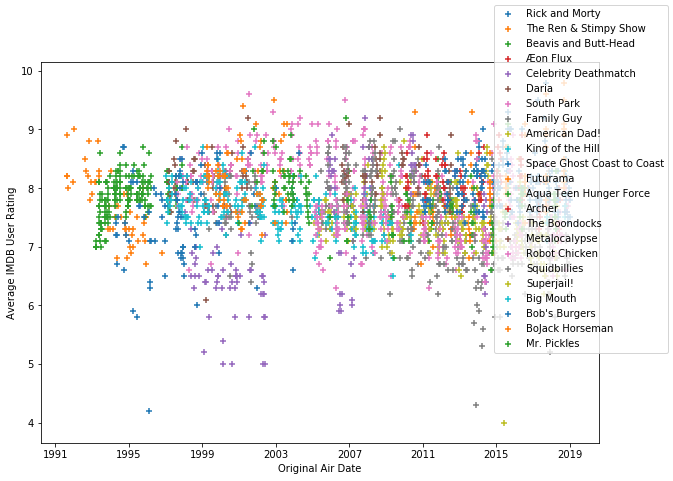

In [21]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

for i in range(len(series)):
    ax.scatter(dates[i], ratings[i], label=series[i]['title'], marker='+')
    
ax.set_xlabel('Original Air Date')
ax.set_ylabel('Average IMDB User Rating')

fig.legend()
fig.show()